<a href="https://colab.research.google.com/github/HarisMashood/ADL_Exercises/blob/main/Exercise_3_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Student Name: Haris Mashood
## Student Number: 2413298
## Campus: Joensuu

# Exercise 3: MNIST CNN with Optimizer Selection

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, Input
import matplotlib.pyplot as plt

In [2]:
# Loading and preprocessing MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist = x_train_mnist[..., tf.newaxis].astype('float32') / 255.0
x_test_mnist = x_test_mnist[..., tf.newaxis].astype('float32') / 255.0
y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Function to create CNN
def create_mnist_cnn(activation, input_shape):
    """Define a CNN model for MNIST classification."""
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation=activation)(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation=activation)(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation=activation)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Selected optimizer and training function
def train_mnist_cnn(model, x_train, y_train, x_test, y_test, optimizer, epochs=10):
    """Train and evaluate the model."""
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        verbose=1)
    return history

In [5]:
# Define optimizer choice
optimizer_choice = tf.keras.optimizers.Adam(learning_rate=0.001)

# Create and train the CNN model
model_mnist = create_mnist_cnn('relu', (28, 28, 1))
history_mnist = train_mnist_cnn(model_mnist, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, optimizer_choice)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9105 - loss: 0.2959 - val_accuracy: 0.9822 - val_loss: 0.0488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9863 - loss: 0.0437 - val_accuracy: 0.9864 - val_loss: 0.0403
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9912 - loss: 0.0274 - val_accuracy: 0.9900 - val_loss: 0.0316
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9902 - val_loss: 0.0347
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.9915 - val_loss: 0.0282
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9973 - loss: 0.0091 - val_accuracy: 0.9906 - val_loss: 0.0328
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9972 - loss: 0.0090 - val_accuracy: 0.9916 - val_loss: 0.0314
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9979 - loss: 0.0066 - 

In [6]:
# Plot training and validation metrics
def plot_mnist_results(history):
    """Plot training and validation loss and accuracy."""
    metrics = ['loss', 'accuracy']
    plt.figure(figsize=(15, 10))

    for i, metric in enumerate(metrics):
        plt.subplot(2, 1, i + 1)
        plt.plot(history.history[metric], label=f'Training {metric.capitalize()}')
        plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')
        plt.title(f'MNIST - {metric.capitalize()}')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()

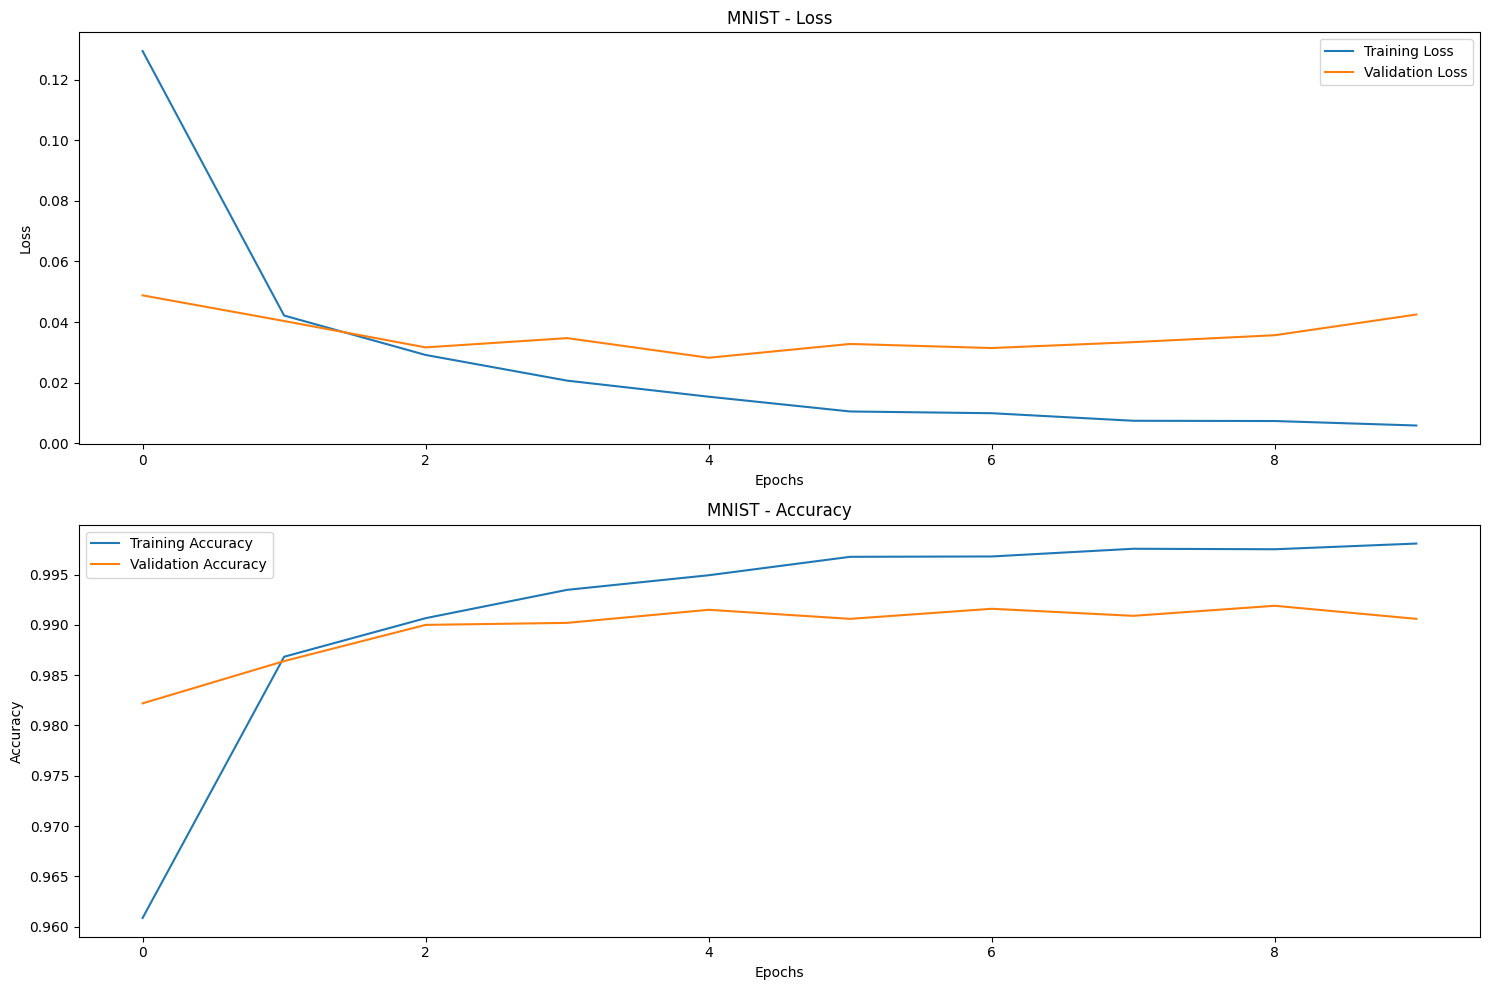

Best validation accuracy: 0.9919 at epoch 9


In [7]:
# Display training results
plot_mnist_results(history_mnist)

# Print the best results
best_epoch = history_mnist.history['val_accuracy'].index(max(history_mnist.history['val_accuracy']))
print(f"Best validation accuracy: {max(history_mnist.history['val_accuracy']):.4f} at epoch {best_epoch + 1}")

# Explanations for Choices

* Activation Function (ReLU): The reason ReLU is used here is that it reduces the vanishing gradient problem, allows for efficient flow of gradients, and introduces sparsity in computation.

* Optimizer (Adam): This dynamically adapts learning rates for each parameter, allowing fast convergence and being robust to noisy gradients. It works quite well on structured datasets such as MNIST.

# Evaluation of Results

* The best validation accuracy of 99.19% was at epoch 9, and the training and validation loss are smooth, with minimum divergence between them.

* Training accuracy reached a high of 99.83%, and the validation accuracy tracked this very closely, indicating excellent generalization.

* The low validation loss across the epochs shows that the model is robust and resists overfitting.

# Why My Choices Are Good
ReLU allows efficient training by solving vanishing gradients and sparsity, and hence, simplifying computations and preventing overfitting. Adam enabled fast convergence through its dynamic learning rates and the adaptability of the optimizer for this dataset.